In [1]:
import os
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import FastICA

In [2]:
sys.path.append("../../src/.")
import plotting_functions as pf

In [3]:
DIR = "../../data/"
SUBWAYUS = "Subway USA/subway_usa_"

In [4]:
train_df = pd.read_csv(DIR + SUBWAYUS + "processed_train.csv", index_col="store")
test_df = pd.read_csv(DIR + SUBWAYUS + "processed_test.csv", index_col="store")

In [5]:
result_df = pd.DataFrame([], index=train_df.index)

## FastICA

In [6]:
# Compute ICA
ica = FastICA(n_components=50, whiten="arbitrary-variance")
S_ = ica.fit_transform(train_df)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
# assert np.allclose(train_df, np.dot(S_, A_.T) + ica.mean_)

In [7]:
ica.components_

array([[ 2.23722589e-06,  6.88763104e-05,  6.94270201e-05, ...,
         1.10457207e-04,  6.63915056e-05,  5.35279769e-04],
       [-1.16531545e-03,  1.10021454e-04,  8.10205358e-05, ...,
         8.74904283e-04, -5.36942250e-04, -4.25146594e-05],
       [-1.19049436e-03,  9.67438977e-05,  3.37177725e-04, ...,
        -1.11231956e-03, -9.16749417e-05,  1.48185727e-03],
       ...,
       [-5.54834366e-04,  3.20486342e-04,  2.64590444e-04, ...,
         1.45589635e-03,  1.07009121e-03, -2.29125852e-04],
       [ 5.95655982e-04, -1.34963512e-03, -6.47506912e-04, ...,
         6.14981781e-04, -1.24178669e-03,  2.22805987e-03],
       [ 7.59637721e-04,  2.06022327e-05,  3.62644079e-04, ...,
         1.10394239e-04,  1.56556034e-03, -7.59471695e-04]])

In [8]:
original_features = train_df.columns.tolist()

In [9]:
ica_features = ica.get_feature_names_out(original_features)

In [10]:
mixing_df = pd.DataFrame(A_.T, index=ica_features, columns=original_features)
mixing_df

,occ_wc_p_ta,hhcy_ta,gdp_ta,disposable_inc_avg_ta,hhgrpycy_ta,hh_type_male_child_p_ta,nces_private_schools_total_enrollment_1mi,hh_type_male_nochild_p_ta,age85pl_p_ta,asian_p_ta,...,popcy_ta,transitstop_nearest_dist,com0002_p_ta,edu_bachplus_p_ta,centerxy_gla_effective_5mi,centerxy_gla_effective_1mi,dtpop_children_at_home_p_ta,hispanic_p_ta,market_size,store_density
fastica0,-4.315753,4.673697,3.308187,4.915687,-0.175494,-10.138579,-0.081264,-9.150984,-0.018160,-7.277643,...,4.675507,-7.895416,-8.656547,6.980262,3.969424,1.302739,-3.590064,4.277700,-12.263761,5.559308
fastica1,-12.104902,6.995900,3.854287,2.230255,5.069975,5.477191,0.901864,-75.400178,-7.383702,2.390312,...,6.456162,-4.505058,-1.391168,5.637864,7.179356,2.550788,0.972420,0.613084,-11.233921,8.006494
fastica2,-31.162539,-0.216241,-3.233038,-17.297592,-2.391332,3.746924,-0.950888,7.737870,6.073950,-6.758070,...,-0.581857,7.715668,5.105117,-20.840683,-1.478786,-0.380270,13.557423,-3.098639,14.977077,-1.610536
fastica3,9.773021,10.390199,5.899876,1.432320,4.668510,-6.725943,7.675402,0.139621,-5.739253,7.075621,...,9.040573,-2.704730,5.890228,11.540824,7.556406,0.634404,-14.839346,3.707687,-11.116078,20.270518
fastica4,-25.888846,6.442042,7.787648,32.908675,15.650076,2.667050,2.261595,1.958614,-14.118349,7.992061,...,9.152365,-5.264800,0.554142,12.009167,6.477687,0.127789,26.027746,6.704229,-9.267749,19.497950
fastica5,-7.956874,-41.168713,-20.171000,-2.826845,2.199731,4.497088,-21.898141,-10.260075,-0.951279,-13.028586,...,-45.631026,2.583446,-1.682462,-4.852538,-8.471694,3.514192,-4.593406,-1.608496,19.459110,-23.787021
fastica6,-1.086455,8.548630,13.164709,4.738770,-0.856039,-5.188877,12.199275,6.629501,0.017263,7.902343,...,6.449634,-3.749707,2.046749,9.173412,14.777854,-1.262892,0.023645,8.636612,-17.966610,35.027804
fastica7,-1.025833,8.500704,2.297582,7.767499,5.614946,-3.916792,1.660870,-1.428188,-3.670427,7.507826,...,7.920670,-3.326084,-0.782983,11.077882,21.449021,95.382700,-8.009238,1.376885,-18.017448,12.848479
fastica8,-0.850382,-19.672480,-7.306874,-11.022563,-14.594624,6.895716,0.367786,-6.246843,3.030848,-6.717313,...,-19.769912,12.171585,54.460713,-12.191272,-19.114616,-4.295019,-8.263242,-2.603427,44.313114,-21.313833
fastica9,-14.133245,-4.772179,1.015582,0.726151,5.296100,-4.295100,3.196292,-5.062175,10.765182,-6.453774,...,-7.423227,2.533396,0.196585,2.231946,-4.945972,-1.755586,-7.691998,-2.980690,16.099558,-10.994296


---

## Hierachical Clustering (Testing)


### ward linkage

In [11]:
from scipy.cluster.hierarchy import (
    average,
    complete,
    fcluster,
    single,
    ward,
)

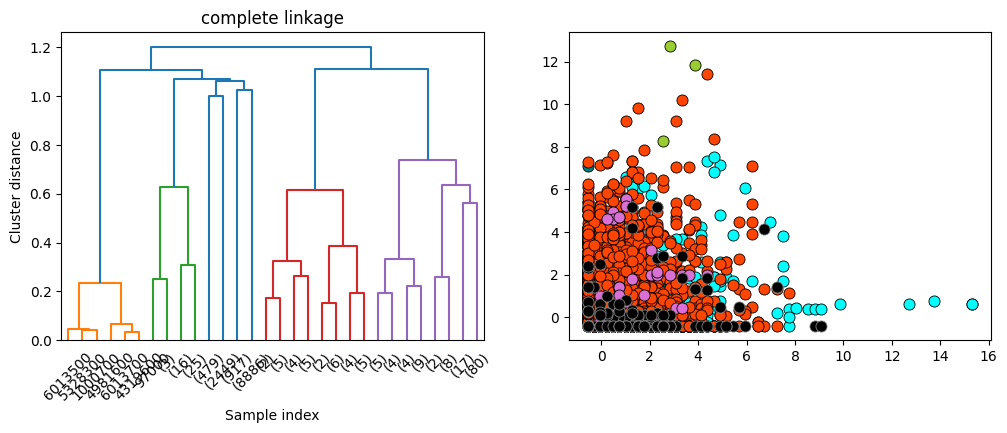

In [16]:
linkage_array = ward(S_)
hier_labels = fcluster(linkage_array, 8, criterion="maxclust")
pf.plot_dendrogram_clusters(
    train_df,
    linkage_array, 
    hier_labels, 
    p=4, 
    linkage_type='complete',
)

In [17]:
unique, counts = np.unique(hier_labels, return_counts=True)
dict(zip(unique, counts))

{1: 6, 2: 45, 3: 479, 4: 2449, 5: 917, 6: 8886, 7: 33, 8: 129}

In [21]:
from matplotlib.pyplot import cm

def plot_transformed_data(data, transformed_data, name):
    plt.subplot(2, 1, 1)
    plt.title(f"Before {name}")
    for sig, color in zip(data.T, iter(cm.rainbow(np.linspace(0, 1, data.shape[1])))):
        plt.plot(sig, color=color)
    plt.subplot(2, 1, 2)
    plt.title(f"{name} signals")
    for sig, color in zip(transformed_data.T, iter(cm.rainbow(np.linspace(0, 1, transformed_data.shape[1])))):
        plt.plot(sig, color=color)
    plt.show()

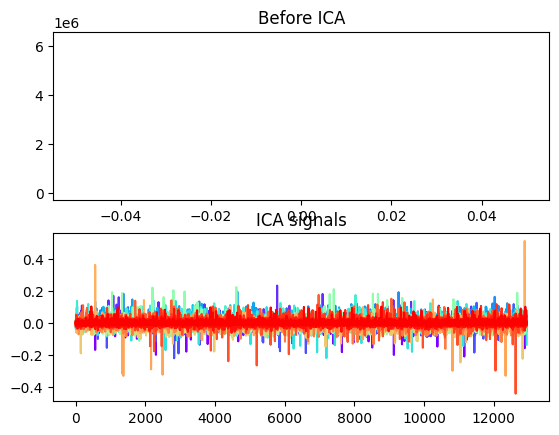

In [23]:
plot_transformed_data(train_df, S_, 'ICA')

---
## K-means with/without ICA (Testing)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, adjusted_mutual_info_score
from time import time

k_values = [3, 4, 5, 6, 7, 8, 9, 10, 15]
def compare_k_values(train_X):
    loan_fit_time = []
    loan_pred_time = []
    loan_sil_scores = []
    loan_rand_scores = []
    loan_mi_scores = []
    loan_inertias = []
    for k in k_values:
        kmeans_model = KMeans(n_clusters=k, random_state=123, max_iter=100, init='random')

        loan_fit_t0 = time()
        kmeans_loan = kmeans_model.fit(train_X)
        loan_fit_t1 = time()
        loan_fit_time.append(loan_fit_t1 - loan_fit_t0)
        loan_pred = kmeans_loan.predict(train_X)
        loan_pred_t1 = time()
        loan_pred_time.append(loan_pred_t1 - loan_fit_t1)
        loan_sil_scores.append(silhouette_score(train_X, loan_pred, random_state=123))
        loan_inertias.append(kmeans_loan.inertia_)

    loan_metric_df = pd.DataFrame(
        {
            'k': k_values,
            'fit_time': loan_fit_time,
            'pred_time': loan_pred_time,
            'silhouette_score': loan_sil_scores,
            'inertias': loan_inertias
        }
    )
    return loan_metric_df

In [32]:
import altair as alt

def plot_kmeans(kmeans_df, simple=False):
    if simple:
        repeated_columns = ['silhouette_score']
    else:
        repeated_columns = ['fit_time', 'pred_time', 'inertias', 'silhouette_score']
    
    k_means_chart = alt.Chart(kmeans_df).mark_line(opacity=0.8, point=True).encode(
         alt.X('k'),
         alt.Y(alt.repeat(), type='quantitative', scale=alt.Scale(zero=False))
    ).properties(
        width=200,
        height=200
    ).repeat(
        repeated_columns,
        columns=3
    )
    return k_means_chart

In [33]:
metric_df = compare_k_values(S_)
plot_kmeans(metric_df)

/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

alt.RepeatChart(...)

In [34]:
original_metric_df = compare_k_values(train_df)
plot_kmeans(original_metric_df)

/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xinrulu/miniconda3/envs/cap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

alt.RepeatChart(...)